In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
filename = '/Users/owner/Desktop/Oct_2022_Imp/imp_dev/all_and_best_Oct_2022.mat'
dat = sio.loadmat(filename)

In [3]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

In [4]:
all_imp = dat['curly_Is_relative']
best_imp_arr = dat['curly_Is_relative_best']
best_imp = best_imp_arr[:,0]

all_imp_df = pd.DataFrame(all_imp,columns = ['All_Imp','All_Imp_Inds'])
best_imp_df = pd.DataFrame(best_imp_arr, columns = ['Best_Imp','Best_Imp_Inds'])

# original (wrong) code
#best_imp_inds_where_nan = best_imp_df[best_imp_df['Best_Imp'].isnull()]['Best_Imp_Inds'].values[:]-1

#remidx = []

#for i in range(len(best_imp_inds_where_nan)):
#    remidx.append(int(best_imp_inds_where_nan[i]))
    
#for i in remidx:
#    all_imp[i] = 0.0

#all_imp_nonan = np.log(all_imp[all_imp>0].copy()*60)
#all_imp_nonan = np.log([x for x in all_imp if str(x) != 'nan']*60)

#best_imp_nonan = np.log(best_imp_df[best_imp_df['Best_Imp'].notnull()]['Best_Imp'].values[:]*60)

#num=301 for the fitting to distribution, num=16 for bins
#edges = np.linspace(min(all_imp_nonan),max(all_imp_nonan),num=16)

In [5]:
# test - replace elements corresponding to best_flares array in all_flares array
all_imp_cp = all_imp[:,0].copy()
j=0
for i in best_imp_arr[:,1]:
    idx = int(i)-1
    all_imp_cp[idx] = best_imp[j]
    j = j+1
    
all_imp_prep = all_imp_cp.copy()

for i in best_imp_df['Best_Imp_Inds'].values:
    ind = int(i)
    all_imp_prep[ind-1]=0.0
    
best_imp_nonan =[]

for i in best_imp_df[best_imp_df['Best_Imp'].notnull()]['Best_Imp']:
    best_imp_nonan.append(i)
    
all_imp_nonan = all_imp_cp.copy()

for i in best_imp_df[best_imp_df['Best_Imp'].isnull()]['Best_Imp_Inds'].values:
    ind = int(i)
    all_imp_nonan[ind-1]=0.0

In [6]:
add=0
for i in range(len(all_imp_cp)):
    if all_imp_cp[i] != all_imp[i,0] and (all_imp_cp[i]>0 or all_imp[i,0]>0):
        print(i)
        print(all_imp_cp[i])
        print(all_imp[i])
        add+=1
print(add)

0


In [7]:
all_imp_prep_cp = all_imp_prep.copy()
all_imp_nonan_cp = all_imp_nonan.copy()

not_best_imp_nonan = all_imp_prep_cp[all_imp_prep_cp < 0.0]
all_imp_nonan = (all_imp_nonan_cp[all_imp_nonan_cp < 0.0])

edges = np.linspace(min(all_imp_nonan),max(all_imp_nonan),num=15)

In [8]:
len(not_best_imp_nonan)

1018

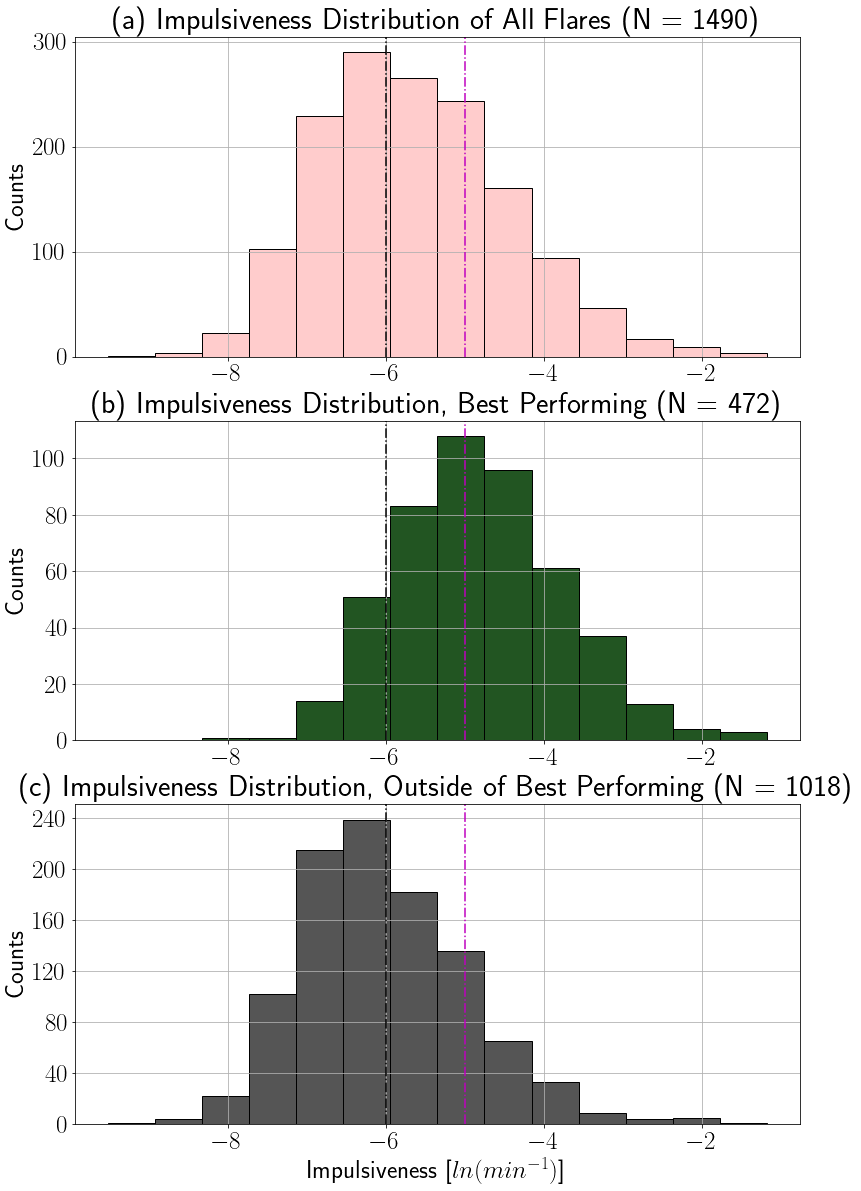

In [9]:
fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize = [13,20])
f = ax2.hist(best_imp_nonan,bins=edges,facecolor='#225522',edgecolor='black')
g = ax3.hist(not_best_imp_nonan,bins=edges,facecolor='#555555',edgecolor='black')
h = ax1.hist(all_imp_nonan,bins=edges,facecolor='#FFCCCC',edgecolor='black')

ax2.grid()
ax3.grid()
ax1.grid()


ax2.set_title('(b) Impulsiveness Distribution, Best Performing (N = 472)',font='Tahoma',fontsize=30,fontweight='bold')
ax3.set_title('(c) Impulsiveness Distribution, Outside of Best Performing (N = 1018)',font='Tahoma',fontsize=30,fontweight='bold')
ax1.set_title('(a) Impulsiveness Distribution of All Flares (N = 1490)',font='Tahoma',fontsize=30,fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=25)
ax3.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.set_ylabel('Counts',fontsize=25)
ax3.set_ylabel('Counts',fontsize=25)
ax1.set_ylabel('Counts',fontsize=25)
ax3.set_xlabel('Impulsiveness [$ln(min^{-1})$]',fontsize=25)
ax1.axvline(-6,c='k',ls='dashdot')
ax1.axvline(-5,c='m',ls='dashdot')
ax2.axvline(-6,c='k',ls='dashdot')
ax2.axvline(-5,c='m',ls='dashdot')
ax3.axvline(-6,c='k',ls='dashdot')
ax3.axvline(-5,c='m',ls='dashdot')
ax3.set_yticks(np.linspace(0,240,7))

In [10]:
# ks test comparison:

#first make pdfs
totalbest = 472
totalnotbest = 1018

bestpdf = f[0]/472
notbestpdf = g[0]/1018

#now cdfs
bestcdf = [bestpdf[0]]
notbestcdf = [notbestpdf[0]]

for i in range(len(bestpdf)-1):
    ind = int(i)
    bestcdf.append(bestcdf[i]+bestpdf[i+1])
    notbestcdf.append(notbestcdf[i]+notbestpdf[i+1])


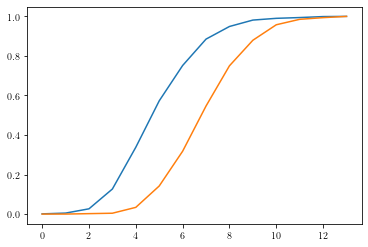

In [11]:
fig,ax= plt.subplots()
plt.plot(notbestcdf)
plt.plot(bestcdf)

In [12]:
result = stats.ks_2samp(notbestcdf,bestcdf)
result

KstestResult(statistic=0.21428571428571427, pvalue=0.9205155471799703)

### so, if we run the ks test on the two cdfs (so the ks test will essentially take the cdf of each cdf), the result is that they COULD be from the same distribution

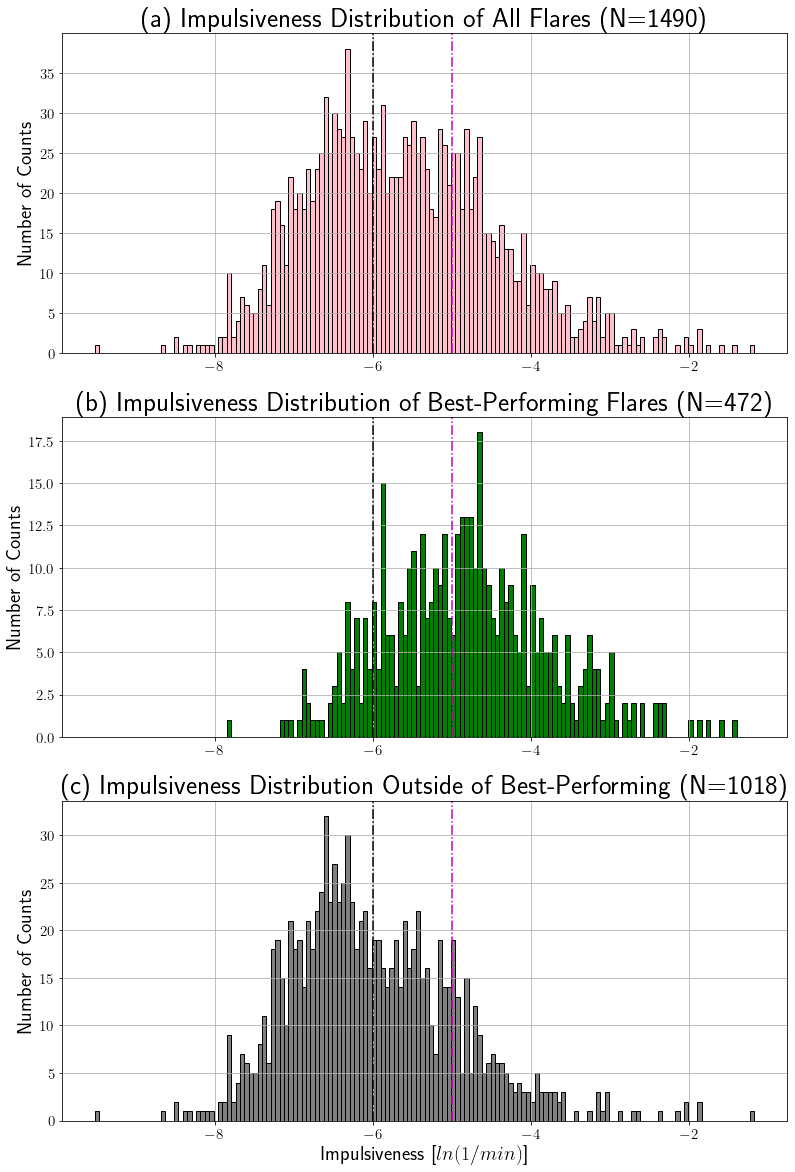

In [13]:
# now run ks test for smaller bin sizes - say, 151
import scipy.stats
all_imp = dat['curly_Is_relative']
best_imp_arr = dat['curly_Is_relative_best']
best_imp = best_imp_arr[:,0]

all_imp_df = pd.DataFrame(all_imp,columns = ['All_Imp','All_Imp_Inds'])
best_imp_df = pd.DataFrame(best_imp_arr, columns = ['Best_Imp','Best_Imp_Inds'])

all_imp_cp = all_imp[:,0].copy()
j=0
for i in best_imp_arr[:,1]:
    idx = int(i)-1
    all_imp_cp[idx] = best_imp[j]
    j = j+1
    
all_imp_prep = all_imp_cp.copy()

for i in best_imp_df['Best_Imp_Inds'].values:
    ind = int(i)
    all_imp_prep[ind-1]=0.0
    
best_imp_nonan =[]

for i in best_imp_df[best_imp_df['Best_Imp'].notnull()]['Best_Imp']:
    best_imp_nonan.append(i)
    
all_imp_nonan = all_imp_cp.copy()

for i in best_imp_df[best_imp_df['Best_Imp'].isnull()]['Best_Imp_Inds'].values:
    ind = int(i)
    all_imp_nonan[ind-1]=0.0

all_imp_prep_cp = all_imp_prep.copy()
all_imp_nonan_cp = all_imp_nonan.copy()

not_best_imp_nonan = all_imp_prep_cp[all_imp_prep_cp < 0.0]
all_imp_nonan = (all_imp_nonan_cp[all_imp_nonan_cp < 0.0])

edges = np.linspace(min(all_imp_nonan),max(all_imp_nonan),num=151)

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize = [13,20])

f = ax2.hist(best_imp_nonan,bins=edges,facecolor='green',edgecolor='black')
g = ax3.hist(not_best_imp_nonan,bins=edges,facecolor='gray',edgecolor='black')
h = ax1.hist(all_imp_nonan,bins=edges,facecolor='pink',edgecolor='black')

ax2.grid()
ax3.grid()
ax1.grid()
ax3.set_xlabel('Impulsiveness [$ln(1/min)$]',fontsize=20)
ax2.set_ylabel('Number of Counts',fontsize=20)
ax3.set_ylabel('Number of Counts',fontsize=20)
ax1.set_ylabel('Number of Counts',fontsize=20)
ax2.set_title('(b) Impulsiveness Distribution of Best-Performing Flares (N=472)',font='Tahoma',fontsize=27,fontweight='bold')
ax3.set_title('(c) Impulsiveness Distribution Outside of Best-Performing (N=1018)',font='Tahoma',fontsize=27,fontweight='bold')
ax1.set_title('(a) Impulsiveness Distribution of All Flares (N=1490)',font='Tahoma',fontsize=27,fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.axvline(-6,c='k',ls='dashdot')
ax1.axvline(-5,c='m',ls='dashdot')
ax2.axvline(-6,c='k',ls='dashdot')
ax2.axvline(-5,c='m',ls='dashdot')
ax3.axvline(-6,c='k',ls='dashdot')
ax3.axvline(-5,c='m',ls='dashdot')

In [14]:
# ks test comparison:

#first make pdfs
totalbest = 472
totalnotbest = 1018

bestpdf = f[0]/472
notbestpdf = g[0]/1018
allpdf =h[0]/1490

#now cdfs
bestcdf = [bestpdf[0]]
notbestcdf = [notbestpdf[0]]
allcdf = [allpdf[0]]

for i in range(len(bestpdf)-1):
    ind = int(i)
    bestcdf.append(bestcdf[i]+bestpdf[i+1])
    notbestcdf.append(notbestcdf[i]+notbestpdf[i+1])
    allcdf.append(allcdf[i]+allpdf[i+1])

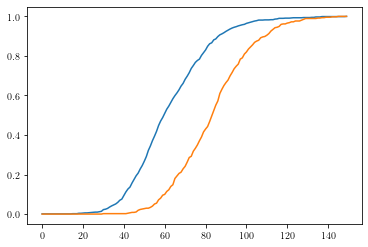

In [15]:
# cdf will obviously look pretty much the same, just higher resolution
fig,ax= plt.subplots()
plt.plot(notbestcdf)
plt.plot(bestcdf)

In [16]:
result2 = stats.ks_2samp(notbestcdf,bestcdf)
result2

KstestResult(statistic=0.2, pvalue=0.0048579332350668775)

## now the result is opposite.  Because higher resolution, smaller bins, we still have a significant number of occupants in each bin, but the result of the k-s test does not pass at the 5% significance level, suggesting that the two are from different populations

In [17]:
edges[1]

-9.462499064687796

['skewness = ', 2.23, ' center = ', -6.9, ' scale = ', 1.74]


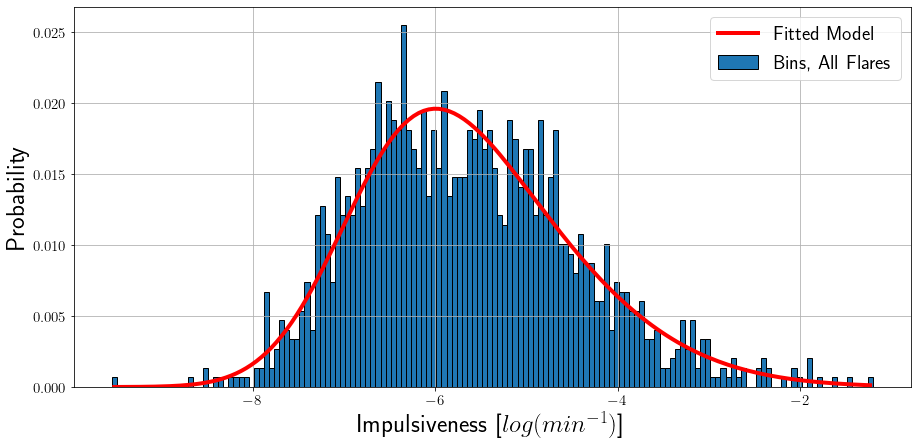

In [18]:
# fit bins to skewed Gaussian?
from scipy.stats import skewnorm
from scipy.stats import norm

hist = np.histogram(all_imp_nonan,bins=edges)
hist_dist = scipy.stats.rv_histogram(hist)

# for all flares
a, loc, scale = 1.0, -6, 1
data = all_imp_nonan
a_estimate, loc_estimate, scale_estimate = stats.skewnorm.fit(data)
print(['skewness = ',round(a_estimate,2),' center = ',round(loc_estimate,2),' scale = ',round(scale_estimate,2)])
skewedgauss = 2*norm.pdf((edges[0:-1]-loc_estimate)/scale_estimate)*norm.cdf(a_estimate*((edges[0:-1]-loc_estimate)/scale_estimate))
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(edges[0:-1],h[0]/sum(h[0]),label='Bins, All Flares',width=(edges[1]-edges[0]),edgecolor='black')
ax.plot(edges[0:-1],(skewedgauss/sum(skewedgauss)),label='Fitted Model',color='red',linewidth=4)
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('Probability',fontsize=25)
ax.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax.tick_params(labelsize=15)
           

['skewness = ', 1.55, ' center = ', -5.76, ' scale = ', 1.4]


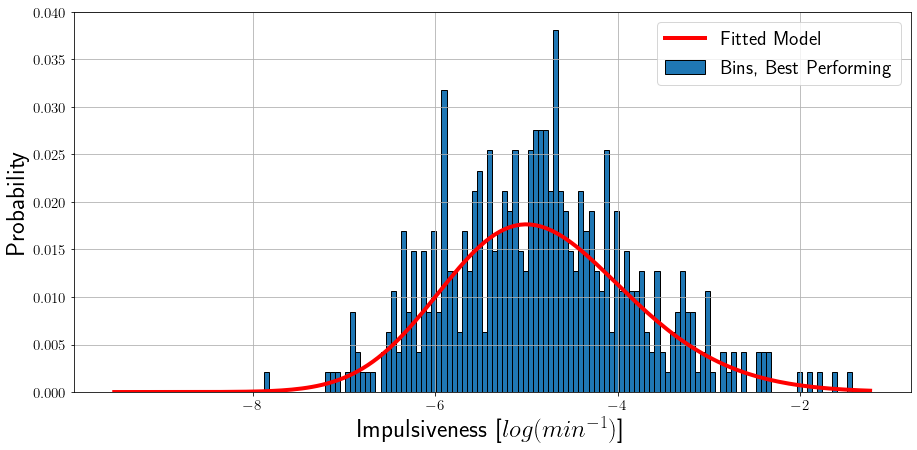

In [19]:
# for best flares
a2, loc2, scale2 = 1.0, -6, 1
data2 = best_imp_nonan
a_estimate2, loc_estimate2, scale_estimate2 = stats.skewnorm.fit(data2)

print(['skewness = ',round(a_estimate2,2),' center = ',round(loc_estimate2,2),' scale = ',round(scale_estimate2,2)])
skewedgauss2 = 2*norm.pdf((edges[0:-1]-loc_estimate2)/scale_estimate2)*norm.cdf(a_estimate2*((edges[0:-1]-loc_estimate2)/scale_estimate2))
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(edges[0:-1],f[0]/sum(np.array(f[0])),label='Bins, Best Performing',width=(edges[1]-edges[0]),edgecolor='black')
ax.plot(edges[0:-1],(skewedgauss2/sum(skewedgauss)),label='Fitted Model',color='red',linewidth=4)
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('Probability',fontsize=25)
ax.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax.tick_params(labelsize=15)

['skewness = ', 2.43, ' center = ', -7.15, ' scale = ', 1.56]


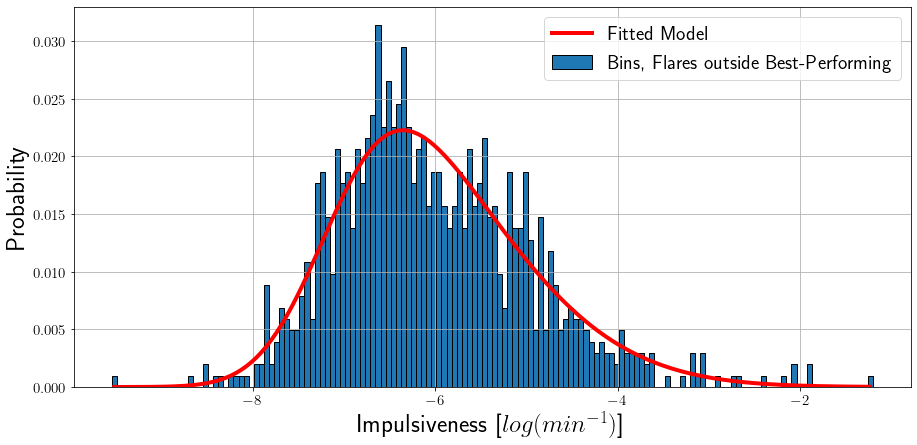

In [20]:
# for not best flares
a3, loc3, scale3 = 1.0, -6, 1
data3 = not_best_imp_nonan
a_estimate3, loc_estimate3, scale_estimate3 = stats.skewnorm.fit(data3)

print(['skewness = ',round(a_estimate3,2),' center = ',round(loc_estimate3,2),' scale = ',round(scale_estimate3,2)])
skewedgauss3 = 2*norm.pdf((edges[0:-1]-loc_estimate3)/scale_estimate3)*norm.cdf(a_estimate3*((edges[0:-1]-loc_estimate3)/scale_estimate3))
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(edges[0:-1],g[0]/sum(g[0]),label='Bins, Flares outside Best-Performing',width=(edges[1]-edges[0]),edgecolor='black')
ax.plot(edges[0:-1],(skewedgauss3/sum(skewedgauss3)),label='Fitted Model',color='red',linewidth=4)
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('Probability',fontsize=25)
ax.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax.tick_params(labelsize=15)

In [21]:
#determination of pdf from cdf of all flares
cdf = allcdf
upperedges = edges[1:]

pdf = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(upperedges[2:], upperedges, cdf[2:], cdf)]

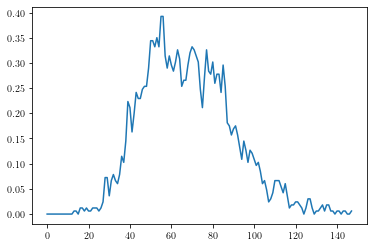

In [22]:
plt.plot(pdf)

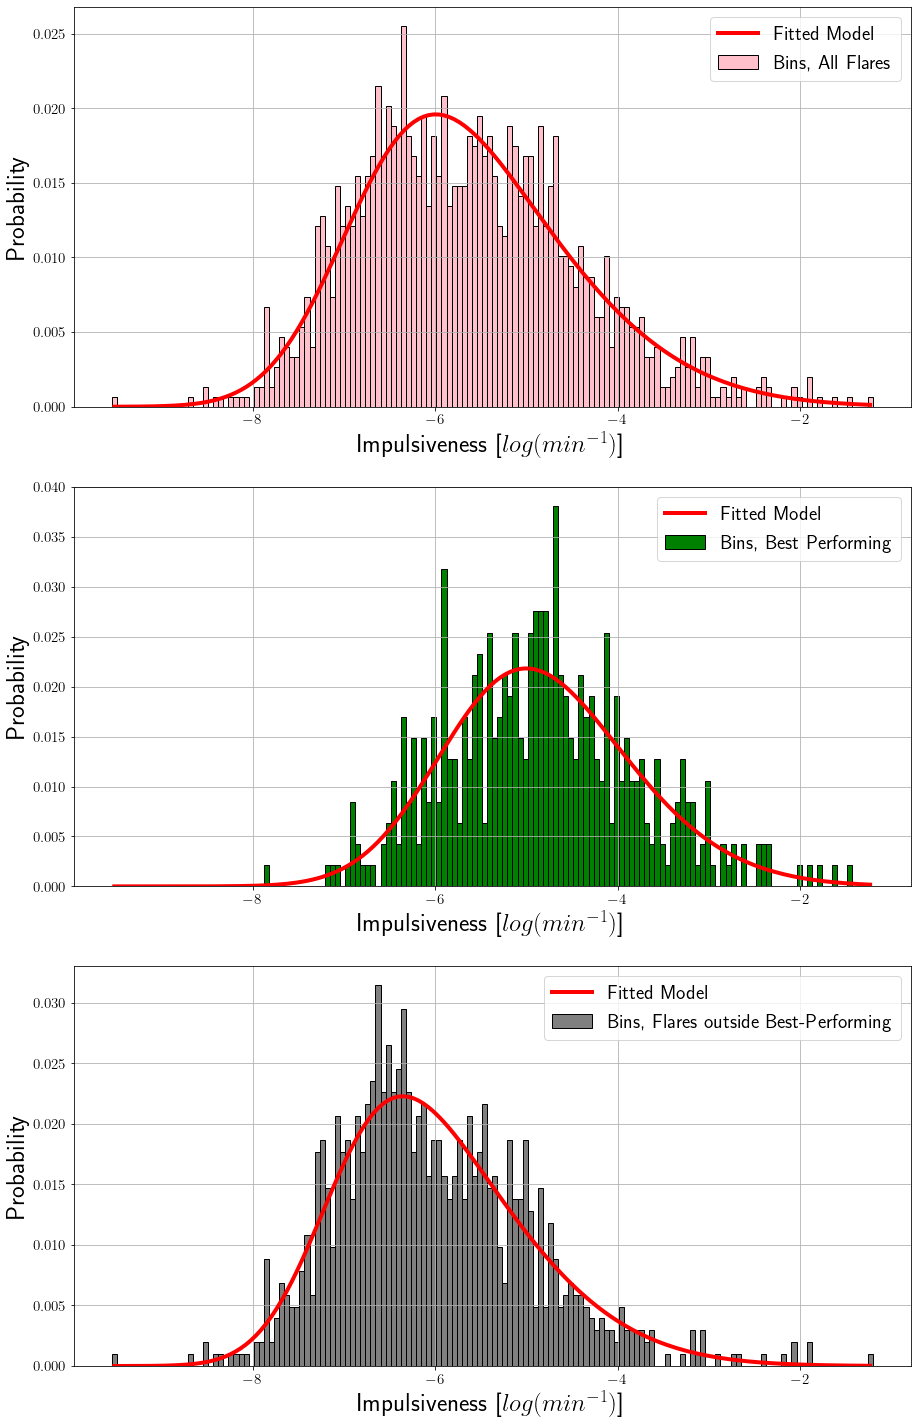

In [23]:
fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(15,25))
binw = edges[1]-edges[0]

ax1.bar(edges[0:-1],h[0]/sum(h[0]),label='Bins, All Flares',width=(edges[1]-edges[0]),edgecolor='black',facecolor='pink')
ax1.plot(edges[0:-1],(skewedgauss)/sum(skewedgauss),label='Fitted Model',color='red',linewidth=4)
ax1.legend(fontsize=20)
ax1.grid()
ax1.set_ylabel('Probability',fontsize=25)
ax1.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax1.tick_params(labelsize=15)

ax2.bar(edges[0:-1],f[0]/sum(f[0]),label='Bins, Best Performing',width=(edges[1]-edges[0]),edgecolor='black',facecolor='green')
ax2.plot(edges[0:-1],(skewedgauss2/sum(skewedgauss2)),label='Fitted Model',color='red',linewidth=4)
ax2.legend(fontsize=20)
ax2.grid()
ax2.set_ylabel('Probability',fontsize=25)
ax2.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax2.tick_params(labelsize=15)

ax3.bar(edges[0:-1],g[0]/sum(g[0]),label='Bins, Flares outside Best-Performing',width=(edges[1]-edges[0]),edgecolor='black',facecolor='grey')
ax3.plot(edges[0:-1],(skewedgauss3/sum(skewedgauss3)),label='Fitted Model',color='red',linewidth=4)
ax3.legend(fontsize=20)
ax3.grid()
ax3.set_ylabel('Probability',fontsize=25)
ax3.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax3.tick_params(labelsize=15)

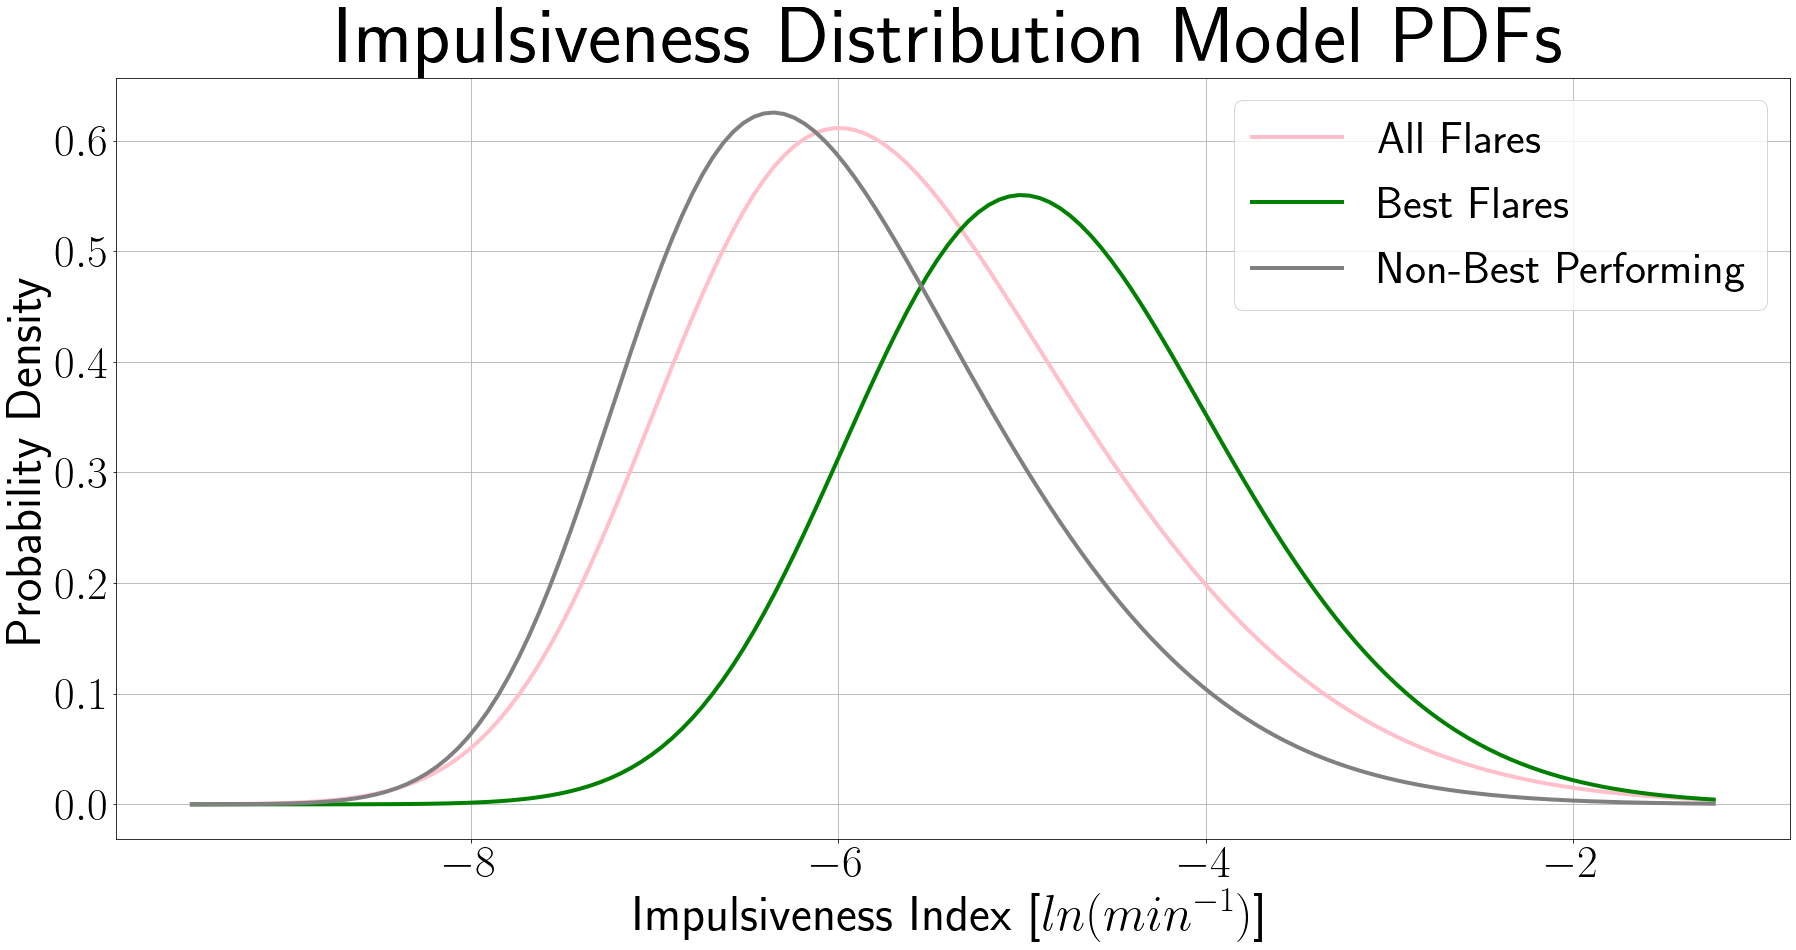

In [24]:
fig,ax = plt.subplots(figsize=(30,14))

ax.plot(edges[0:-1],(skewedgauss),label='All Flares',color='pink',linewidth=4)
ax.plot(edges[0:-1],(skewedgauss2),label='Best Flares',color='green',linewidth=4)
ax.plot(edges[0:-1],(skewedgauss3),label='Non-Best Performing',color='grey',linewidth=4)
ax.legend(fontsize=45)
ax.set_xlabel(r'Impulsiveness Index [$ln(min^{-1})$]',fontsize=50)
ax.set_ylabel('Probability Density',fontsize=50)
ax.set_title('Impulsiveness Distribution Model PDFs',fontsize=80)
ax.tick_params(labelsize=45)
ax.grid()

In [36]:
bestcdf_mod = [skewedgauss2[0]/sum(skewedgauss2)]
notbestcdf_mod = [skewedgauss3[0]/sum(skewedgauss3)]

for i in range(len(bestpdf)-1):
    ind = int(i)
    bestcdf_mod.append(bestcdf_mod[i]+skewedgauss2[i+1]/sum(skewedgauss2))
    notbestcdf_mod.append(notbestcdf_mod[i]+skewedgauss3[i+1]/sum(skewedgauss3))

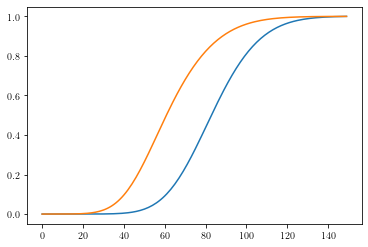

In [37]:
fig,ax = plt.subplots()
ax.plot(bestcdf_mod)
ax.plot(notbestcdf_mod)

In [38]:
# Use the high-cadence bins for the K-S test; use the models for difference in means?
result3 = stats.ks_2samp(notbestcdf_mod,bestcdf_mod)
result3

KstestResult(statistic=0.15333333333333332, pvalue=0.058681986033679176)

In [ ]:
# Just barely above the 5% significance level, when comparing the models.  When comparing the means for the model:

In [39]:
stats.ttest_ind(skewedgauss2,skewedgauss3)

Ttest_indResult(statistic=-0.8058941521692833, pvalue=0.4209464919009682)

In [42]:
stats.ttest_ind(best_imp_nonan,not_best_imp_nonan)

Ttest_indResult(statistic=20.082457893880715, pvalue=1.4322317730253686e-79)

The two clearly do not have the same mean.  Let's use the model for the K-S test, and the data for the difference in means - and use 10% significance level for the K_S test (or undefined). So, noting that the p-value is very close to the boundary for the 5% signficance level, neiher the K-S test nor (and certainly not) the student's t test for difference in means suggest that these two are the same distribution

In [25]:
# now the pdfs are continuous, so we can actually compare them (and, hopefully, show that they are not the same distribution...)

In [26]:
from distfit import distfit

exset = ['lognorm','powernorm','t','norm','dweibull','gausshyper','skewnorm']

dist1 = distfit(distr=exset)
all_distfit = dist1.fit_transform(all_imp_nonan)
dist2 = distfit(distr=exset)
best_distfit = dist2.fit_transform(np.array(best_imp_nonan))
dist3 = distfit(distr=exset)
notbest_distfit = dist3.fit_transform(not_best_imp_nonan)

[distfit] >fit..
[distfit] >transform..
[distfit] >[lognorm   ] [0.09 sec] [RSS: 0.030088] [loc=-13.186 scale=7.466]
[distfit] >[powernorm ] [0.20 sec] [RSS: 0.0272411] [loc=-7.230 scale=0.536]
[distfit] >[t         ] [0.13 sec] [RSS: 0.0499844] [loc=-5.628 scale=1.187]
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0499822] [loc=-5.628 scale=1.187]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.0440541] [loc=-5.672 scale=1.038]
[distfit] >[gausshyper] [0.32 sec] [RSS: 0.049005] [loc=-10.252 scale=10.532]
[distfit] >[skewnorm  ] [0.05 sec] [RSS: 0.0298743] [loc=-6.897 scale=1.737]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[lognorm   ] [0.07 sec] [RSS: 0.128635] [loc=-14.606 scale=9.728]
[distfit] >[powernorm ] [0.16 sec] [RSS: 0.130433] [loc=-5.938 scale=0.618]
[distfit] >[t         ] [0.09 sec] [RSS: 0.135347] [loc=-4.823 scale=1.041]
[distfit] >[norm      ] [0.00 sec] [RSS: 0.135418] [loc=-4.823 scale=1.042]
[distfit] >[dweibull  ]

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\npowernorm\nRSS(c=0.113566, loc=-7.22982, scale=0.536407)'}, xlabel='Values', ylabel='Frequency'>)

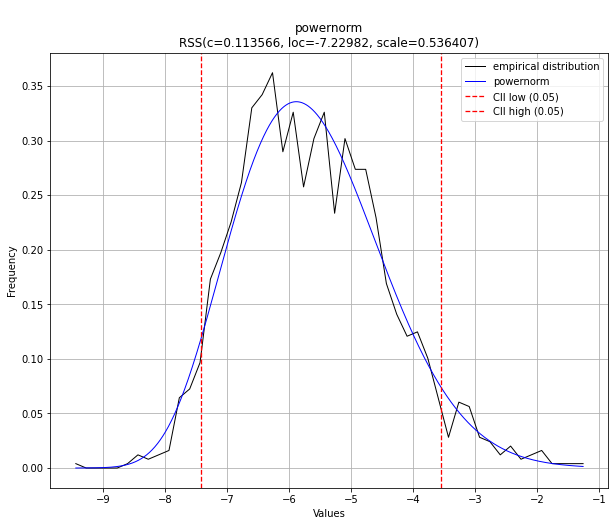

In [175]:
dist1.plot()

[distfit] >plot summary..


(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: powernorm'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

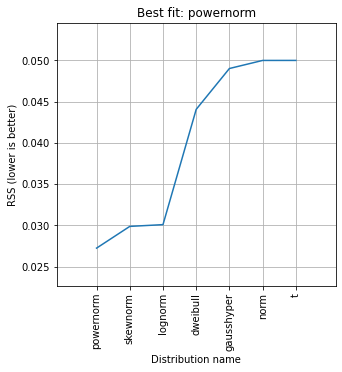

In [181]:
dist1.plot_summary(figsize=(5,5))

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nlognorm\nRSS(s=0.106178, loc=-14.6065, scale=9.7283)'}, xlabel='Values', ylabel='Frequency'>)

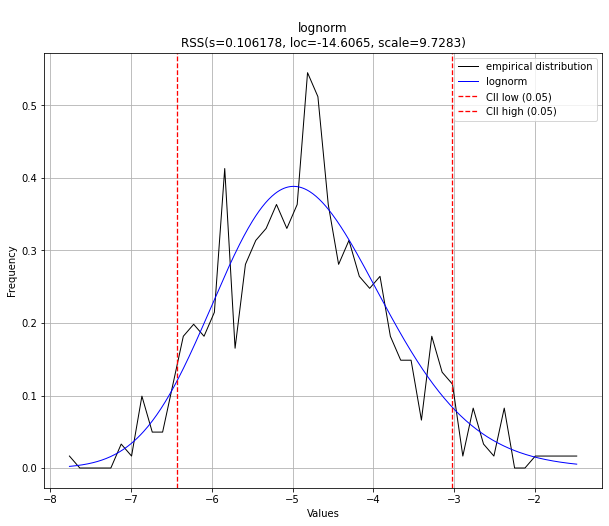

In [177]:
dist2.plot()

[distfit] >plot summary..


(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: lognorm'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

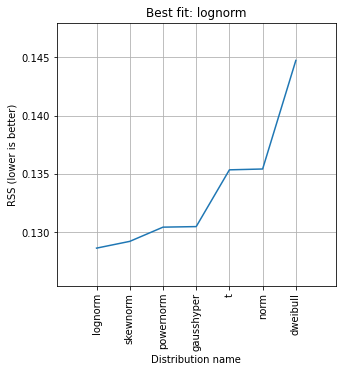

In [182]:
dist2.plot_summary(figsize=(5,5))

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nskewnorm\nRSS(a=2.43248, loc=-7.14889, scale=1.56085)'}, xlabel='Values', ylabel='Frequency'>)

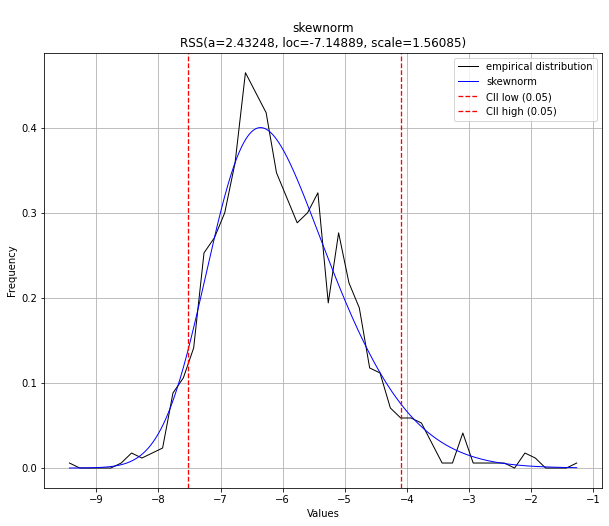

In [179]:
dist3.plot()

[distfit] >plot summary..


(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: skewnorm'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

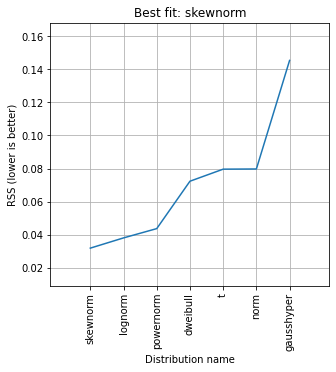

In [183]:
dist3.plot_summary(figsize=(5,5))

# Do the same for events with identified QPPs.  I think because of the low bin resolution, the result will likely be that the two could potentially be from the same population...but I could be wrong.

In [327]:
filename2 = '/Users/owner/Desktop/Oct_2022_Imp/imp_dev/qpp_lowres_bins_correct.mat'
dat3 = sio.loadmat(filename2)

In [329]:
dat3 = dat3['imp_qpp_notnan']

In [330]:
dat3

array([[        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [-4.81786176],
       [        nan],
       [        nan],
       [        nan],
       [-4.62171455],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [-5.18043054],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [-4.70917761],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [-4

In [307]:
edgesavg = []

for i in range(len(edges)-1):
    edgesavg.append((edges[i]+edges[i+1])/2)

In [310]:
len(edgesavg)

14

In [313]:
all2[0]

array([  0,   0,   0,   1,   9,  28,  68,  94, 114,  80,  42,  23,   8,
         4,   1], dtype=uint8)

In [323]:
len(all2[0])

15

(-9.0, -0.5)

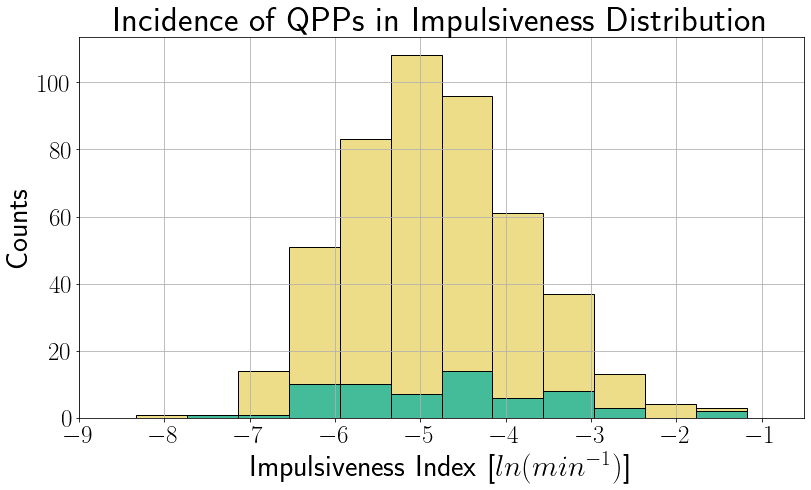

In [343]:
edges = np.linspace(min(all_imp_nonan),max(all_imp_nonan),num=15)

fig,ax = plt.subplots(figsize = [13,7])
m = ax.hist(best_imp_nonan,bins=edges,facecolor='#EEDD88',edgecolor='black')
n = ax.hist(dat3,bins=edges,facecolor='#44BB99',edgecolor='black')
#n = ax.bar(part2,bins=edges,facecolor='#44BB99',edgecolor='black')
ax.grid()

ax.set_title('Incidence of QPPs in Impulsiveness Distribution',font='Tahoma',fontsize=35,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylabel('Counts',fontsize=30)
ax.set_xlabel('Impulsiveness Index [$ln(min^{-1})$]',font='Tahoma',fontweight='bold',fontsize=30)
ax.set_xlim([-9.,-.5])
#ax.set_yticks(np.linspace(0,240,7))

In [286]:
filename = '/Users/owner/Desktop/Oct_2022_Imp/imp_dev/qpp_bins.mat'
dat2 = sio.loadmat(filename)

In [163]:
# high res bins

In [164]:
noqpp1=dat2['noqpppart'][0]

In [165]:
qpp1=dat2['part'][0]

In [179]:
#first make pdfs
totalqpp1 = sum(qpp1)
totalnoqpp1 = sum(noqpp1)

withqpppdf1 = qpp1/totalqpp1
noqpppdf1 = noqpp1/totalnoqpp1

#now cdfs
withqppcdf1 = [withqpppdf1[0]]
noqppcdf1 = [noqpppdf1[0]]

for i in range(len(withqpppdf1)-1):
    ind = int(i)
    withqppcdf1.append(withqppcdf1[i]+withqpppdf1[i+1])
    noqppcdf1.append(noqppcdf1[i]+noqpppdf1[i+1])

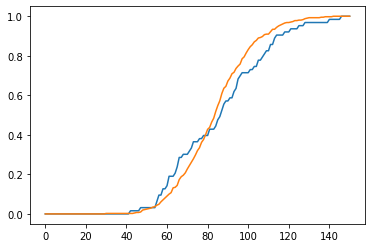

In [180]:
# cdf will obviously look pretty much the same, just higher resolution
fig,ax= plt.subplots()
plt.plot(withqppcdf1)
plt.plot(noqppcdf1)

In [181]:
resultqpp = stats.ks_2samp(withqppcdf1,noqppcdf1)
resultqpp

KstestResult(statistic=0.12582781456953643, pvalue=0.1832905925158008)

In [183]:
#with high res bins, we stil can't reject the null hypothesis.  Should be even more inconclusive with low res bins:
noqpp2=dat2['noqpppart2'][0]
qpp2=dat2['part2'][0]

#first make pdfs
totalqpp2 = sum(qpp2)
totalnoqpp2 = sum(noqpp2)

withqpppdf2 = qpp2/totalqpp2
noqpppdf2 = noqpp2/totalnoqpp2

#now cdfs
withqppcdf2 = [withqpppdf2[0]]
noqppcdf2 = [noqpppdf2[0]]

for i in range(len(withqpppdf2)-1):
    ind = int(i)
    withqppcdf2.append(withqppcdf2[i]+withqpppdf2[i+1])
    noqppcdf2.append(noqppcdf2[i]+noqpppdf2[i+1])

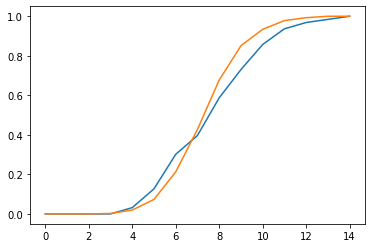

In [184]:
# cdf will obviously look pretty much the same, just higher resolution
fig,ax= plt.subplots()
plt.plot(withqppcdf2)
plt.plot(noqppcdf2)

In [186]:
resultqpp = stats.ks_2samp(withqppcdf2,noqppcdf2)
resultqpp

KstestResult(statistic=0.13333333333333333, pvalue=0.9997887537139585)